In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [38]:
train_data = pd.read_csv('data/diabetes.csv')

In [39]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
train_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
features = list(train_data)
print('Count of missed values\n')
for it in features[:-1]:
    print(it,':', train_data[it].loc[train_data[it] == 0].count())

Count of missed values

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0


In [42]:
mode_values = train_data.mean()[:-1]
for it in features[:-1]:
    train_data[it].loc[train_data[it] == 0] = mode_values[it]

c:\users\zanzi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
print('Count of missed values\n')
for it in features[:-1]:
    print(it,':', train_data[it].loc[train_data[it] == 0].count())

Count of missed values

Pregnancies : 0
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0


In [4]:
train_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
train_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [21]:
X = train_data.drop(columns=['Outcome'], axis=1)

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [23]:
y = train_data.Outcome

In [25]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [28]:
rf_clf = RandomForestClassifier()

In [33]:
params = {'n_estimators':range(1,100,10),
          'max_depth':range(2,15,2),
          'min_samples_leaf':range(2,30,5),
          'min_samples_split':range(2,30,5),
          "criterion":['gini', 'entropy']}

In [34]:
grid_search_cv = RandomizedSearchCV(rf_clf, params, cv=5)

In [35]:
grid_search_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 15, 2),
                                        'min_samples_leaf': range(2, 30, 5),
                                        'min_samples_split': range(2, 30, 5),
                                        'n_estimators': range(1, 100, 10)})

In [36]:
best_clf = grid_search_cv.best_estimator_

In [38]:
best_clf.score(X_test, y_test)

0.78125

In [37]:
from sklearn.metrics import precision_score, recall_score

In [40]:
prediction_proba = best_clf.predict_proba(X_test)

(array([31., 29., 27., 17., 22., 23., 19., 10.,  4., 10.]),
 array([0.0215282 , 0.10213378, 0.18273935, 0.26334493, 0.3439505 ,
        0.42455607, 0.50516165, 0.58576722, 0.6663728 , 0.74697837,
        0.82758394]),
 <BarContainer object of 10 artists>)

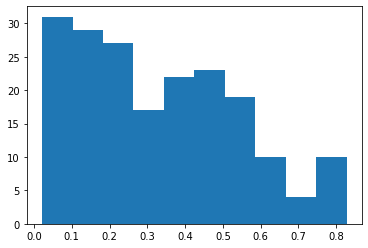

In [46]:
plt.hist(prediction_proba[:, 1])

In [66]:
prediction = best_clf.predict(X_test)

In [67]:
def calc_metrics(prediction):
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1_metric = 2*precision*recall / (precision + recall)
    print('precision:',precision,'\n','recall:',recall, '\n', 'F1:', f1_metric)

In [68]:
calc_metrics(prediction)

precision: 0.7272727272727273 
 recall: 0.5161290322580645 
 F1: 0.6037735849056604


В задании необходимо определить болен ли человек диабетом, то есть в нашем случае стоит оптимизировать метрику recall, так как лучше если не выявить заболевание опаснее чем выявить его ошибочно

In [90]:
prediction = np.where(prediction_proba[:,1] > 0.35, 1, 0)

In [91]:
calc_metrics(prediction)

precision: 0.5747126436781609 
 recall: 0.8064516129032258 
 F1: 0.6711409395973154


Оптимизируя метрику recall, так же удалось улучшить значение f1 метрики